In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
import random
from sklearn.metrics import confusion_matrix

In [2]:
x_train = np.genfromtxt('x_train.csv',delimiter=',',usecols=range(1,271),skip_header=1)

In [3]:
x_test= np.genfromtxt('x_test.csv',delimiter=',',usecols=range(1,271),skip_header=1)

In [4]:
y_train=np.genfromtxt('y_train.csv',delimiter=',',usecols=[1],skip_header=1)

In [5]:
y_test=np.genfromtxt('y_test.csv',delimiter=',',usecols=[1],skip_header=1)

In [6]:
x_unseen=np.genfromtxt('x_unseen.csv',delimiter=',',usecols=range(1,271),skip_header=1)

In [7]:
y_unseen=np.genfromtxt('y_unseen.csv',delimiter=',',usecols=[1],skip_header=1)

In [8]:
y=y_train
y_train=[]
for i in range(len(y)):
    y_train.append(np.array([int(y[i])]))
y_train=np.array(y_train)

In [9]:
y=y_test
y_test=[]
for i in range(len(y)):
    y_test.append(np.array([int(y[i])]))
y_test=np.array(y_test)

In [10]:
y=y_unseen
y_unseen=[]
for i in range(len(y)):
    y_unseen.append(np.array([int(y[i])]))
y_unseen=np.array(y_unseen)

In [20]:
x_unseen.shape

(14877, 270)

In [19]:
def build_fc_model():
  fc_model = keras.Sequential([
      
      tf.keras.layers.Dense(128, activation=tf.nn.relu,input_shape=(270,)),
      tf.keras.layers.Dense(64, activation=tf.nn.relu),
      tf.keras.layers.Dense(32, activation=tf.nn.relu),
      tf.keras.layers.Dense(16, activation=tf.nn.relu),
      tf.keras.layers.Dense(1)
      
  ])
  return fc_model

model = build_fc_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               34688     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 45,569
Trainable params: 45,569
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='mse',
              metrics=['accuracy'])
# optimizer= tf.keras.optimizers.SGD with SGD standing for **stochastic gradient descent 
# learning rate is the amount of change the model undergoes during the training process
# 'sparse_categorical_crossentropy' loss the crossentropy loss between the labels and predictions.

In [21]:
BATCH_SIZE = 64
EPOCHS = 5
history=model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
4373/4373 [==============================] - 6s 1ms/step - loss: 0.0463 - accuracy: 0.9421
Epoch 2/5
4373/4373 [==============================] - 7s 1ms/step - loss: 0.0319 - accuracy: 0.9576
Epoch 3/5
4373/4373 [==============================] - 7s 1ms/step - loss: 0.0273 - accuracy: 0.9625
Epoch 4/5
4373/4373 [==============================] - 7s 2ms/step - loss: 0.0258 - accuracy: 0.9648
Epoch 5/5
4373/4373 [==============================] - 7s 1ms/step - loss: 0.0244 - accuracy: 0.9663


In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test) 

print('Test accuracy:', test_acc)

3748/3748 [==============================] - 4s 1ms/step - loss: 0.0230 - accuracy: 0.9694
Test accuracy: 0.9694314002990723


In [23]:
test_loss, test_acc = model.evaluate(x_unseen, y_unseen) 

print('Test accuracy:', test_acc)

465/465 [==============================] - 1s 1ms/step - loss: 0.0722 - accuracy: 0.9043
Test accuracy: 0.9042817950248718


In [24]:
predictions = model.predict(x_unseen)

In [25]:
for i in range(len(predictions)) :
  if abs(predictions[i]-1)<abs(predictions[i]):
    predictions[i]=1
  else: 
    predictions[i]=0

In [26]:
score = f1_score(predictions, y_unseen)

print ("Decision Tree F1 score:"+str(score))

Decision Tree F1 score:0.9186843307446323


In [27]:
print("Confusion matrix \n", confusion_matrix(y_unseen, predictions))

Confusion matrix 
 [[5409 1229]
 [ 195 8044]]


<ipython-input-32-92d5b425e1c3>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


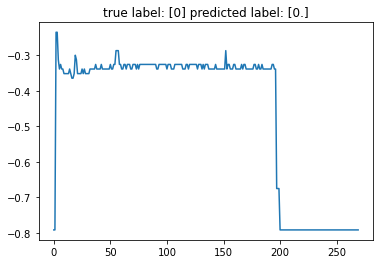

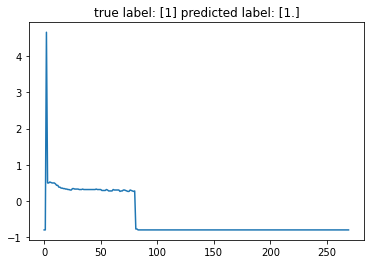

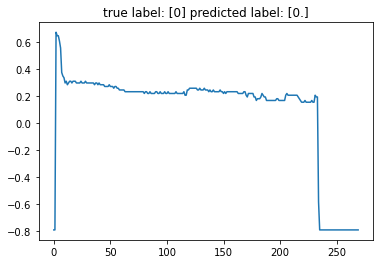

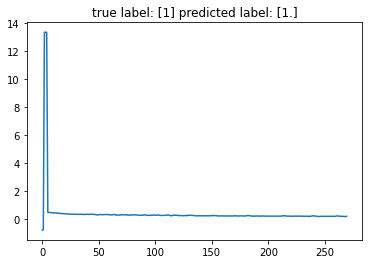

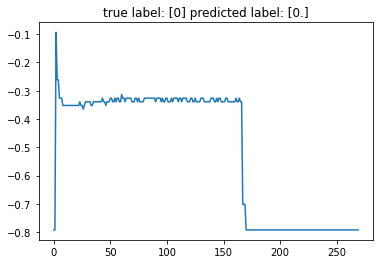

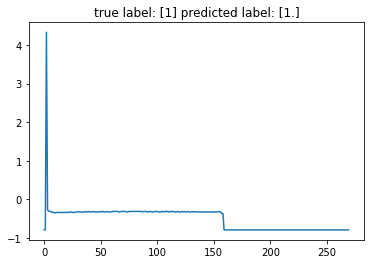

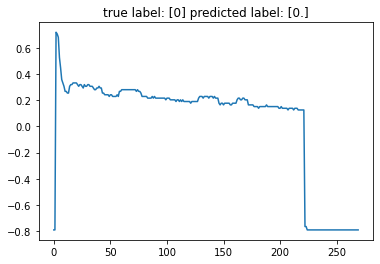

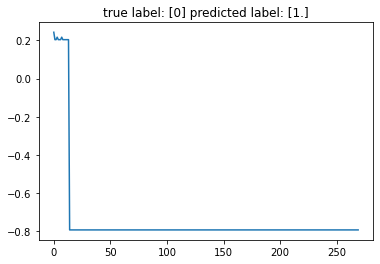

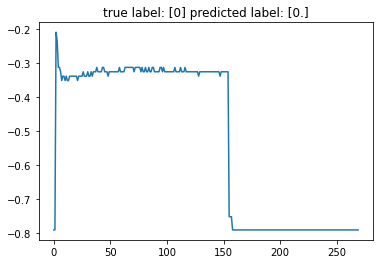

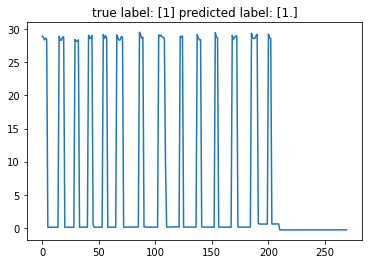

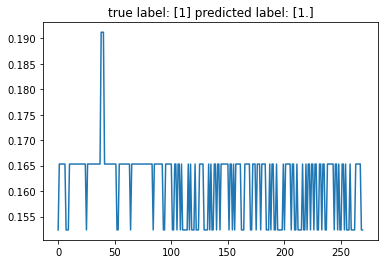

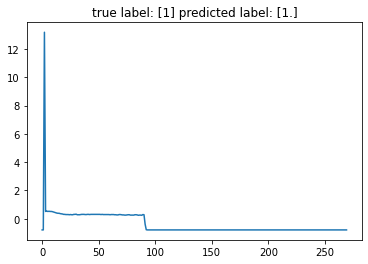

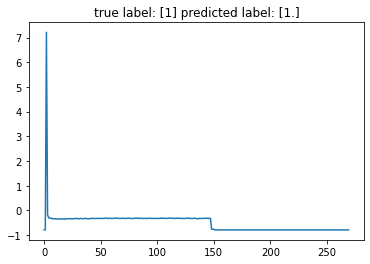

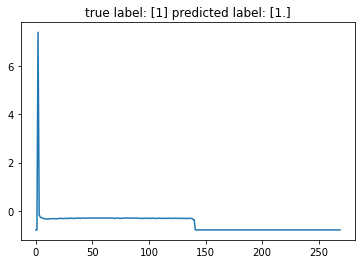

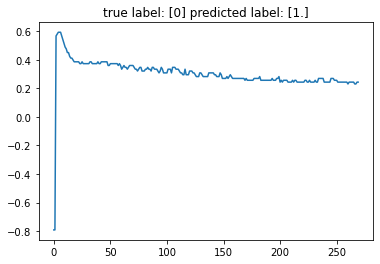

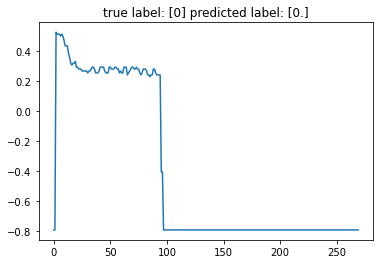

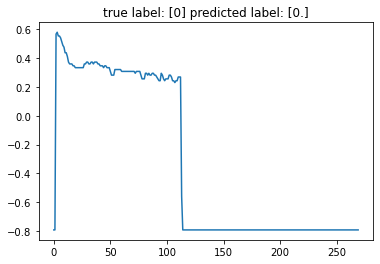

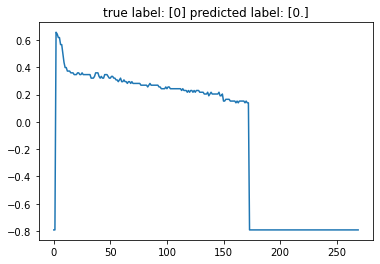

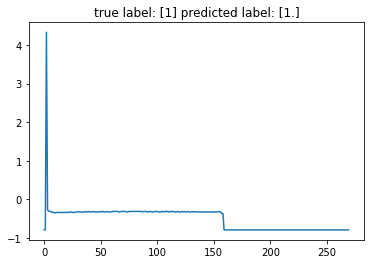

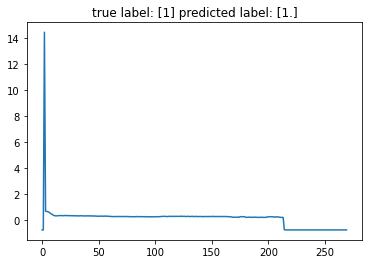

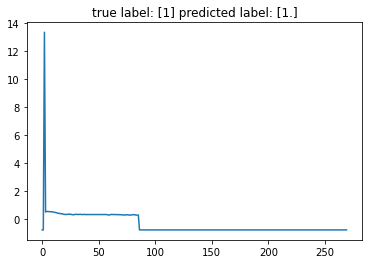

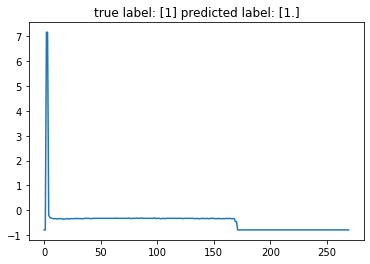

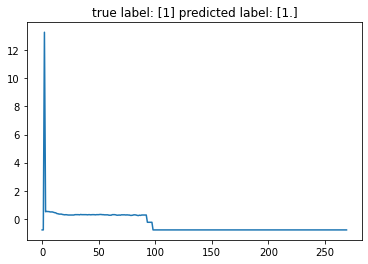

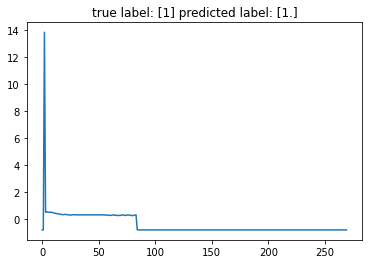

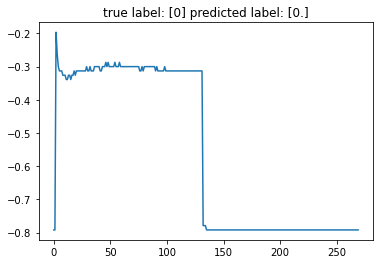

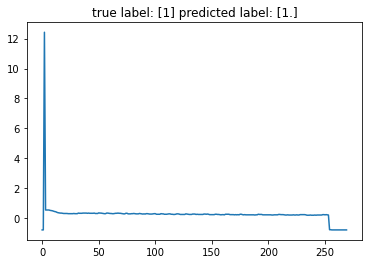

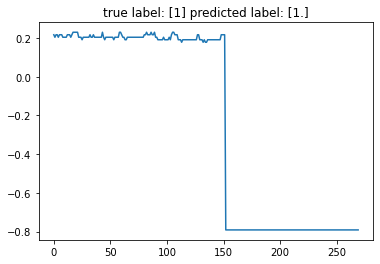

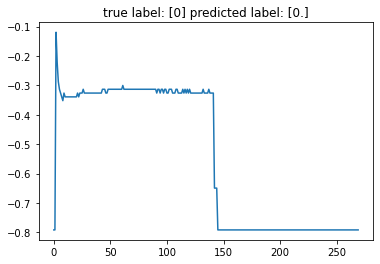

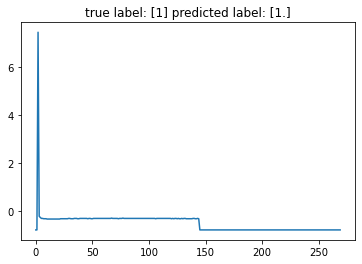

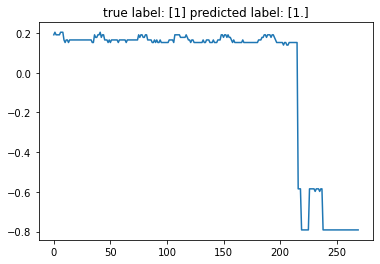

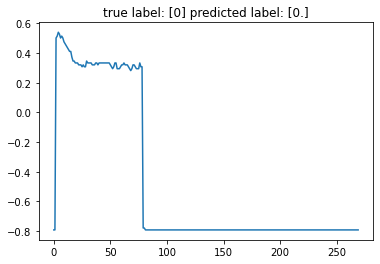

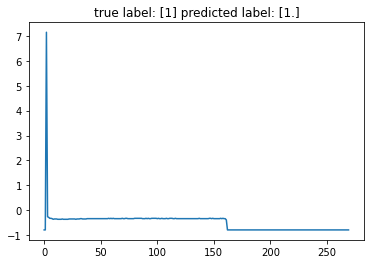

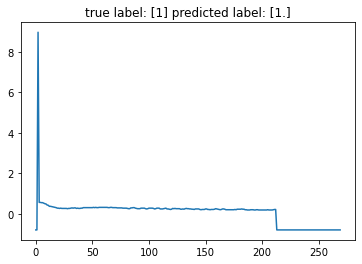

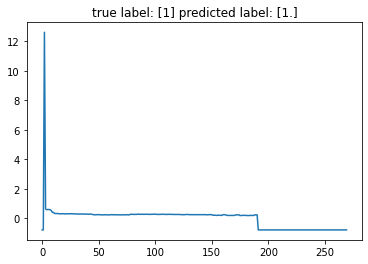

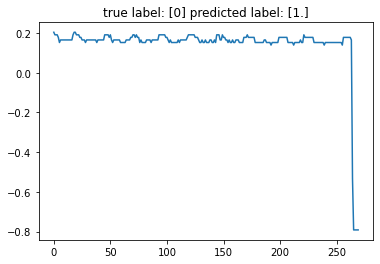

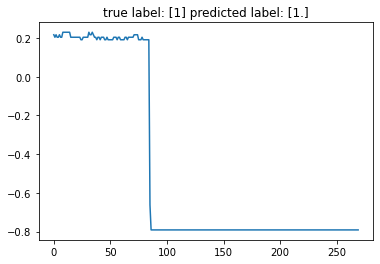

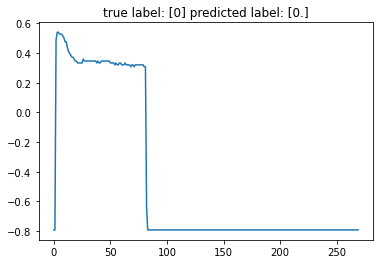

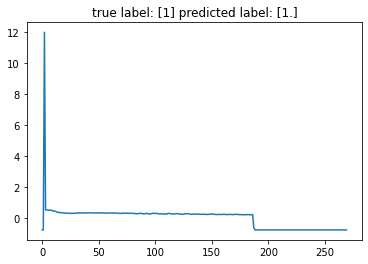

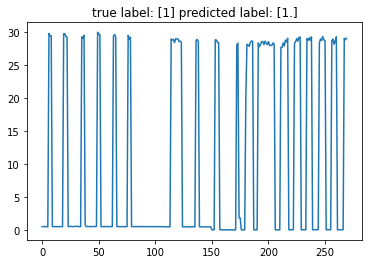

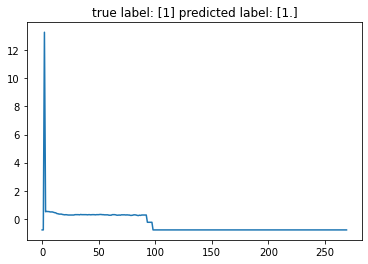

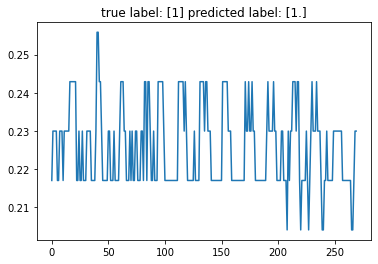

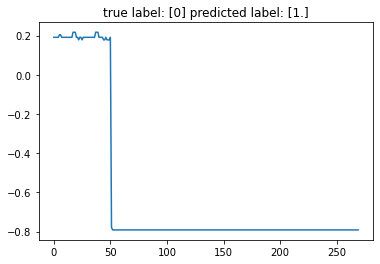

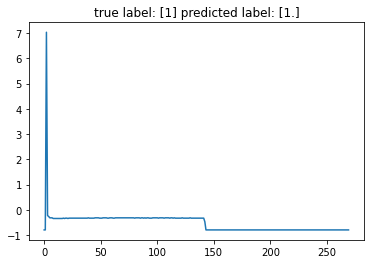

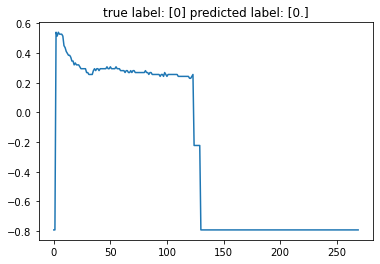

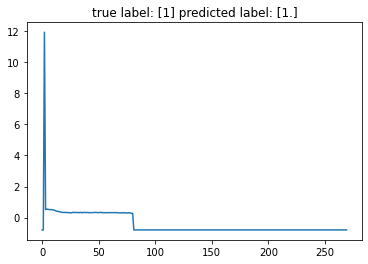

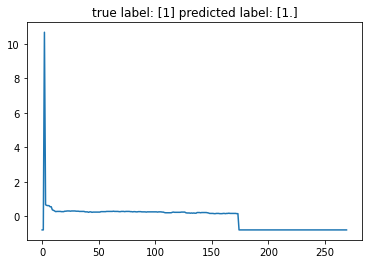

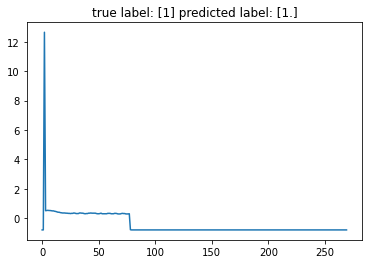

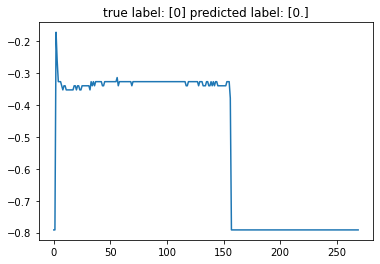

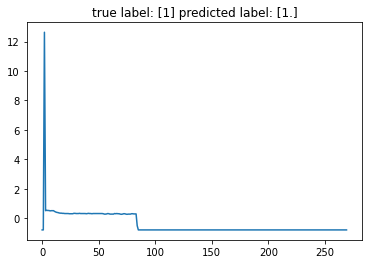

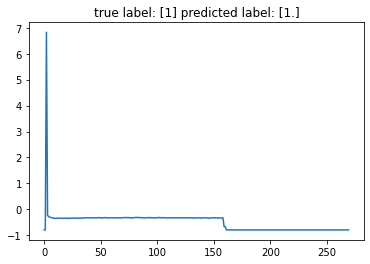

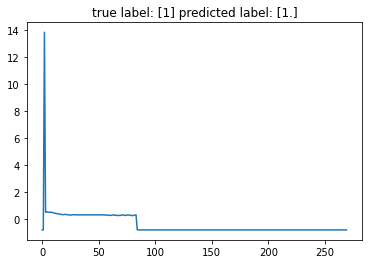

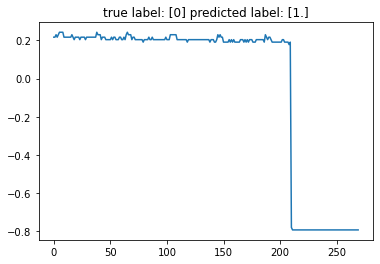

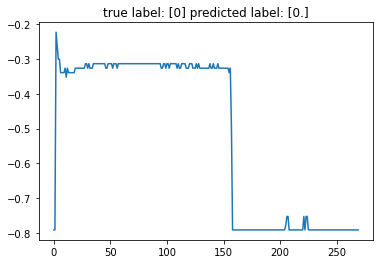

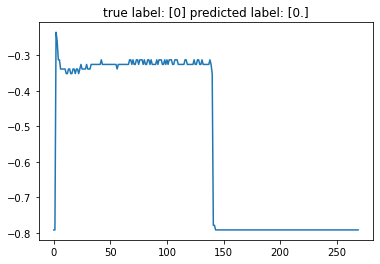

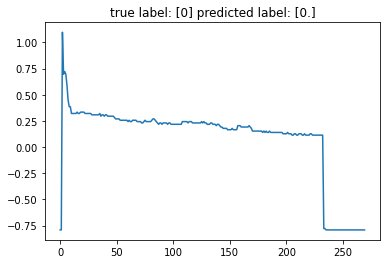

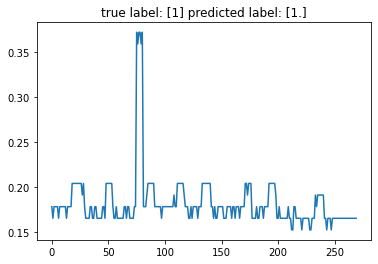

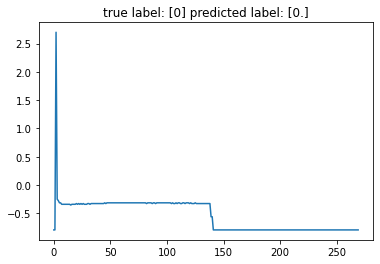

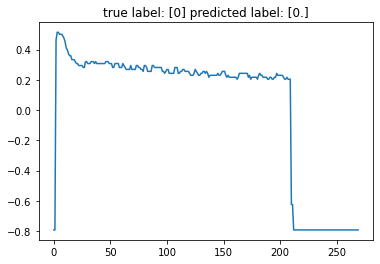

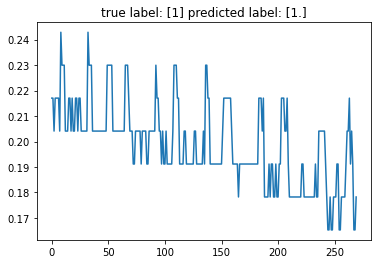

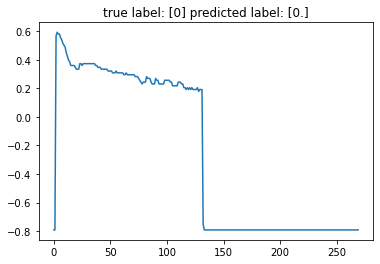

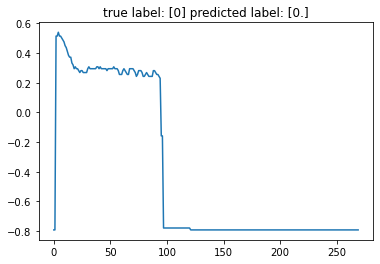

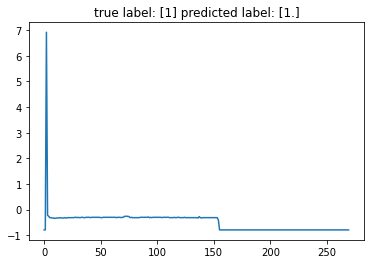

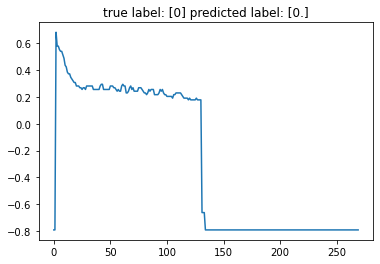

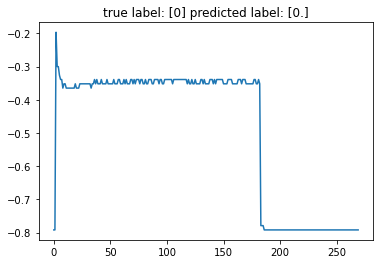

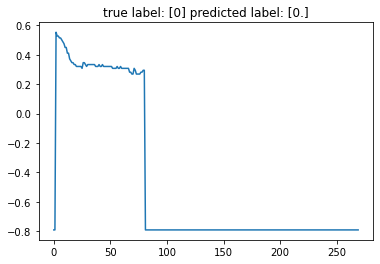

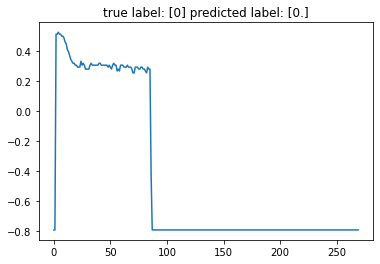

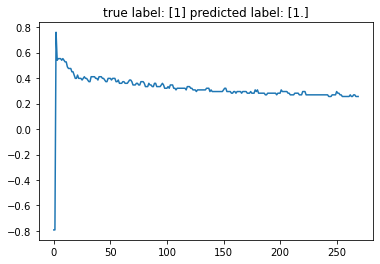

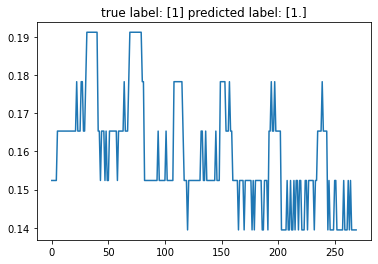

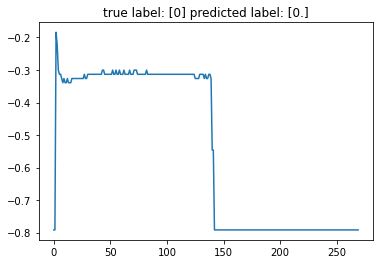

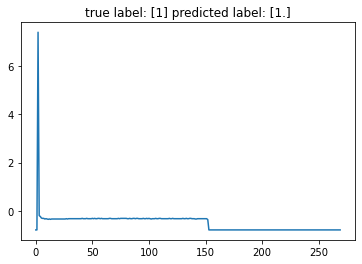

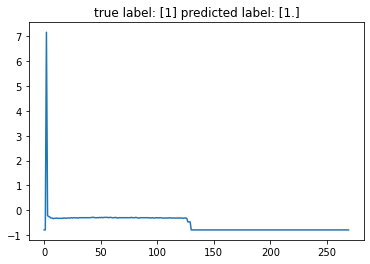

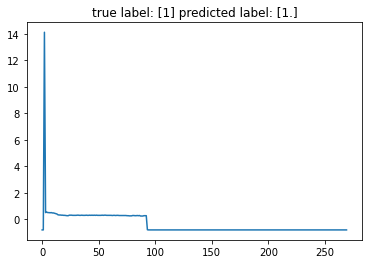

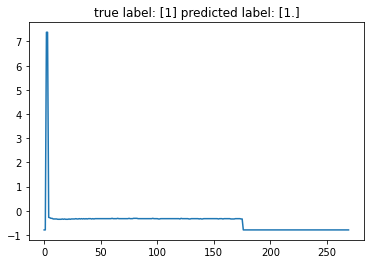

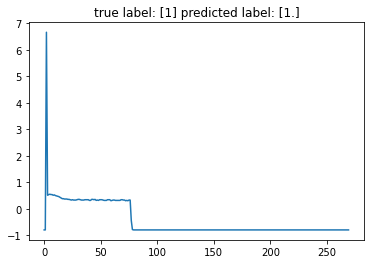

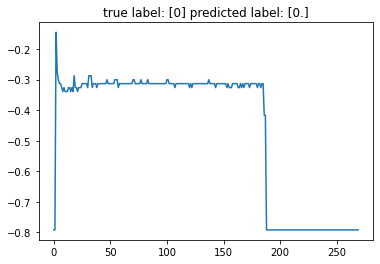

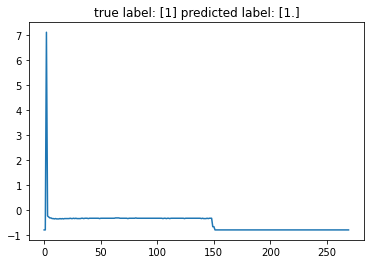

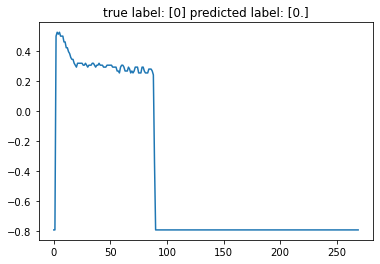

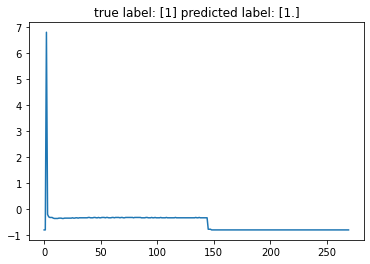

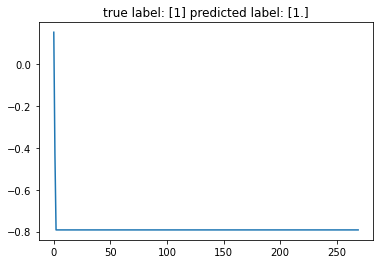

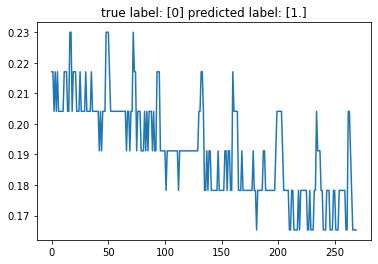

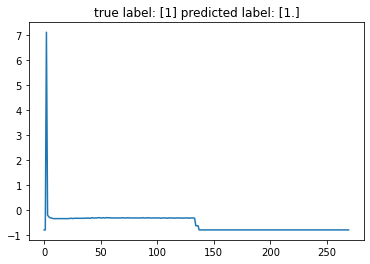

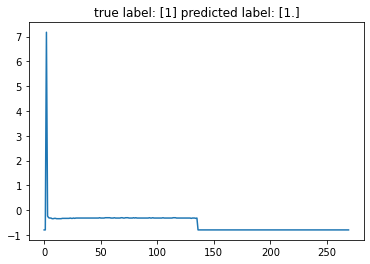

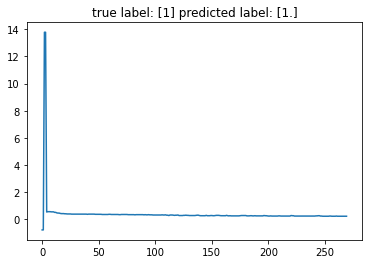

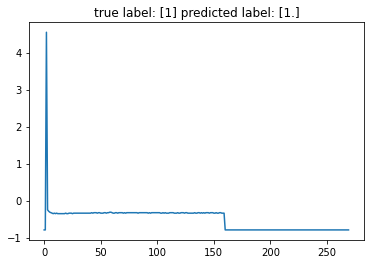

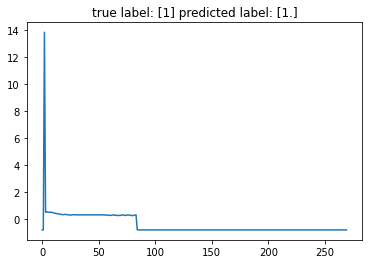

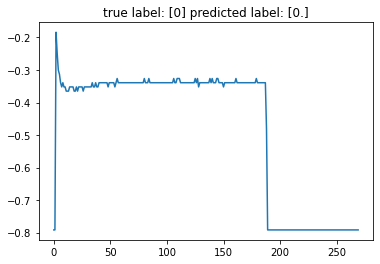

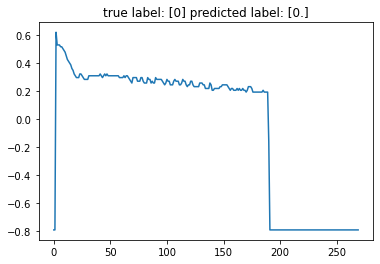

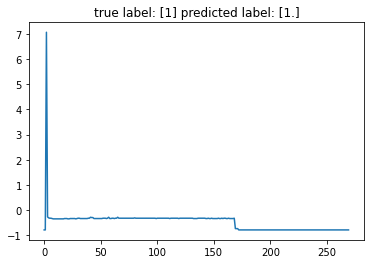

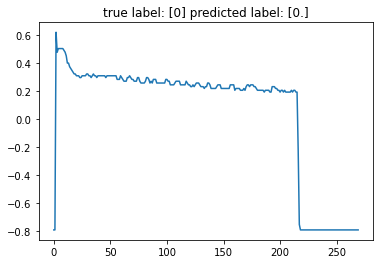

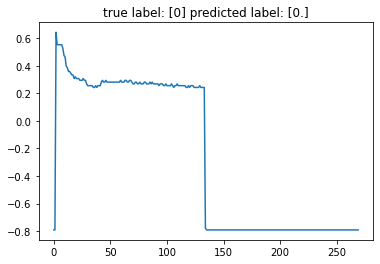

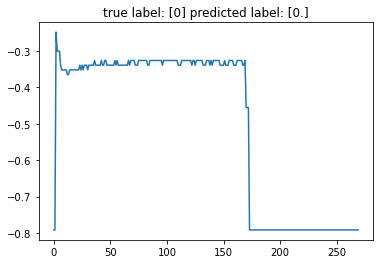

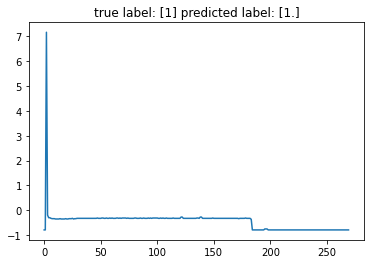

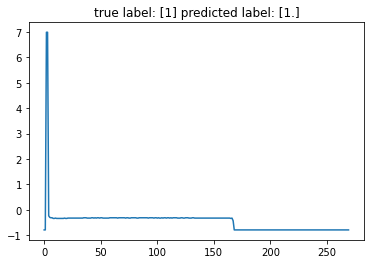

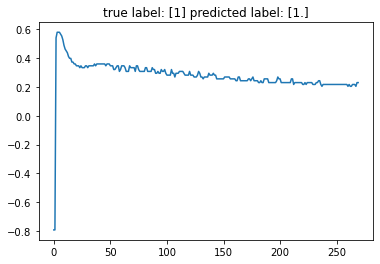

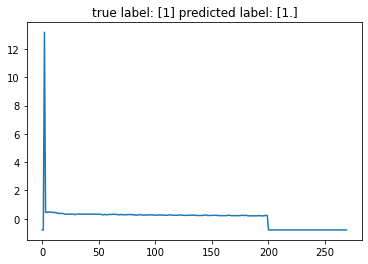

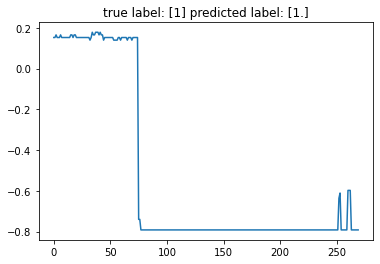

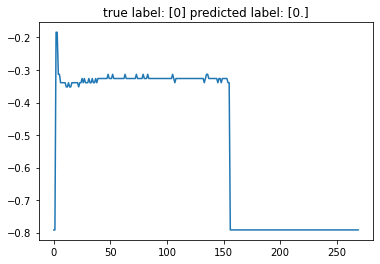

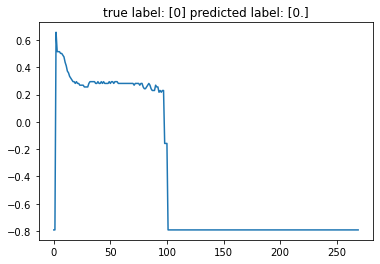

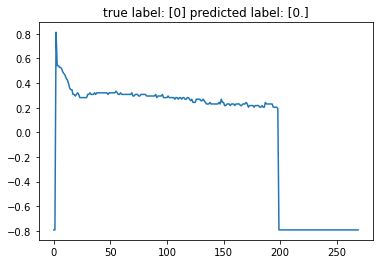

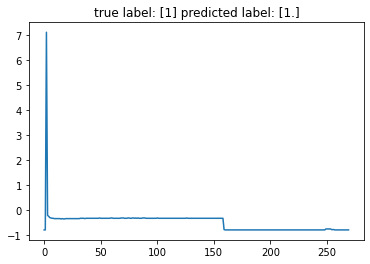

In [32]:
activation_list=random.sample(range(0, len(y_unseen)),100)
for i in activation_list:
    plt.figure()
    plt.plot(x_unseen[i])
    plt.title("true label: " +str(y_unseen[i])+" predicted label: "+str(predictions[i]))

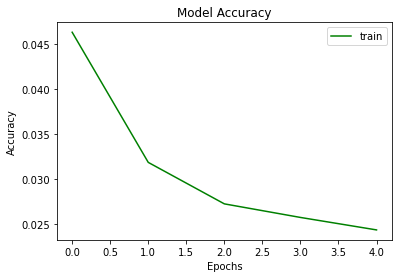

In [28]:
plt.plot(history.history['loss'],'g')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train'])
plt.show()

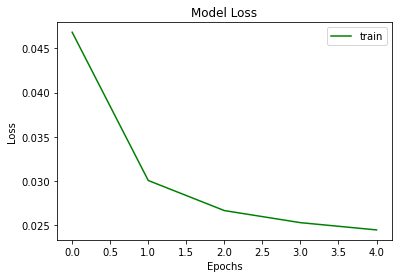

In [41]:
plt.plot(history.history['loss'],'g')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train'])
plt.show()

In [21]:
x_train=x_train.reshape(279829, 270,1)
x_test=x_test.reshape(119927,270,1)
x_unseen=x_unseen.reshape(14877, 270, 1)

In [12]:
def build_conv_model():
  conv_model = tf.keras.Sequential([
      
      tf.keras.layers.Conv1D(filters=32,kernel_size=3, activation=tf.nn.relu,input_shape=(270,1)),
      tf.keras.layers.Conv1D(filters=16,kernel_size=3, activation=tf.nn.relu),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64, activation=tf.nn.relu),
      tf.keras.layers.Dense(32, activation=tf.nn.relu),
      tf.keras.layers.Dense(1)
      
  ])
  return conv_model

In [13]:
model_conv = build_conv_model()
model_conv.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 268, 32)           128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 266, 16)           1552      
_________________________________________________________________
dropout (Dropout)            (None, 266, 16)           0         
_________________________________________________________________
flatten (Flatten)            (None, 4256)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                272448    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3

In [14]:
model_conv.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='mse',
              metrics=['accuracy'])
# optimizer= tf.keras.optimizers.SGD with SGD standing for **stochastic gradient descent 
# learning rate is the amount of change the model undergoes during the training process
# 'sparse_categorical_crossentropy' loss the crossentropy loss between the labels and predictions.

In [15]:
BATCH_SIZE = 64
EPOCHS = 5
history=model_conv.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=20)

Epoch 1/20
4373/4373 [==============================] - 16s 4ms/step - loss: 0.0468 - accuracy: 0.9399
Epoch 2/20
4373/4373 [==============================] - 13s 3ms/step - loss: 0.0309 - accuracy: 0.9591
Epoch 3/20
4373/4373 [==============================] - 13s 3ms/step - loss: 0.0262 - accuracy: 0.9651
Epoch 4/20
4373/4373 [==============================] - 14s 3ms/step - loss: 0.0236 - accuracy: 0.9689
Epoch 5/20
4373/4373 [==============================] - 14s 3ms/step - loss: 0.0216 - accuracy: 0.9717
Epoch 6/20
4373/4373 [==============================] - 14s 3ms/step - loss: 0.0203 - accuracy: 0.9734
Epoch 7/20
4373/4373 [==============================] - 14s 3ms/step - loss: 0.0197 - accuracy: 0.9746
Epoch 8/20
4373/4373 [==============================] - 14s 3ms/step - loss: 0.0184 - accuracy: 0.9764
Epoch 9/20
4373/4373 [==============================] - 14s 3ms/step - loss: 0.0179 - accuracy: 0.9770
Epoch 10/20
4373/4373 [==============================] - 14s 3ms/step - l

In [16]:
test_loss, test_acc = model_conv.evaluate(x_test, y_test) 

print('Test accuracy:', test_acc)

3748/3748 [==============================] - 7s 2ms/step - loss: 0.0127 - accuracy: 0.9832
Test accuracy: 0.9832314848899841


In [22]:
predictions = model_conv.predict(x_unseen)
for i in range(len(predictions)) :
  if abs(predictions[i]-1)<abs(predictions[i]):
    predictions[i]=1
  else: 
    predictions[i]=0

score = f1_score(predictions, y_unseen)
print ("Decision Tree F1 score:"+str(score))

print("Confusion matrix \n", confusion_matrix(y_unseen, predictions))

Decision Tree F1 score:0.9057340671045624
Confusion matrix 
 [[5631 1007]
 [ 586 7653]]


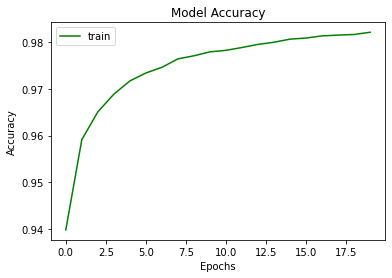

<Figure size 432x288 with 0 Axes>

In [31]:
plt.plot(history.history['accuracy'],'g')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train'])
plt.show()
plt.savefig('plots/Conv_Model_Improved/Conv_Net_History.jpg',dpi=184)

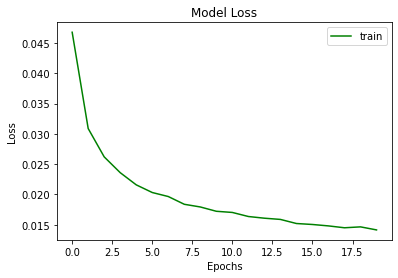

<Figure size 432x288 with 0 Axes>

In [32]:
plt.plot(history.history['loss'],'g')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train'])
plt.show()
plt.savefig('plots/Conv_Model_Improved/Conv_Net_Loss.jpg',dpi=184)

<ipython-input-30-95f3d26adb3c>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


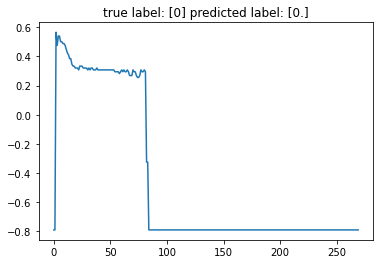

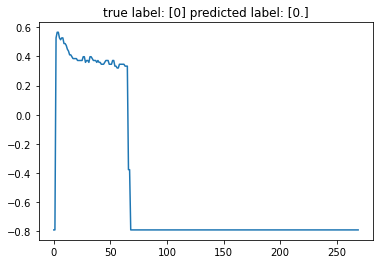

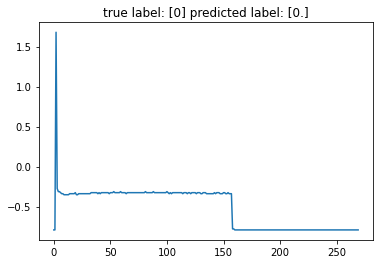

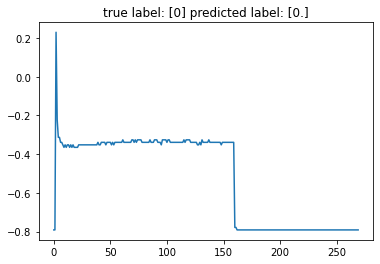

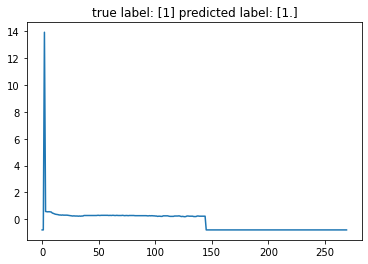

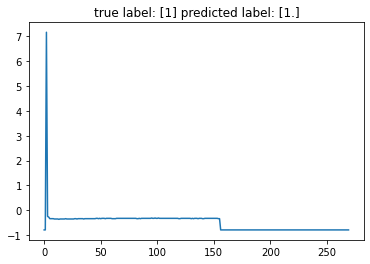

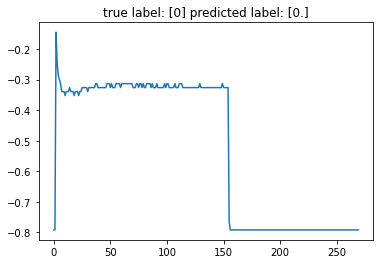

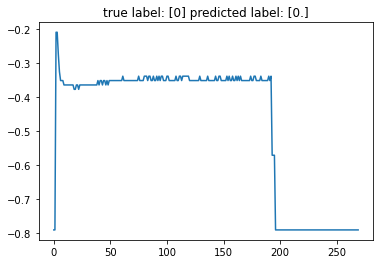

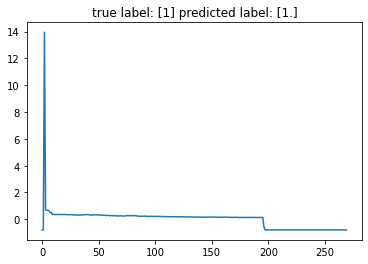

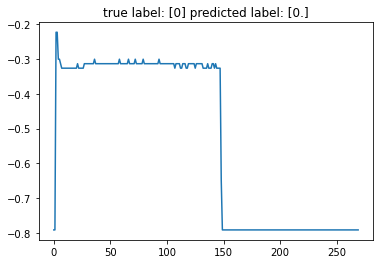

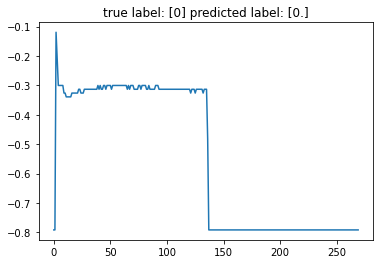

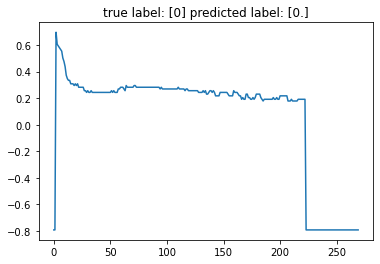

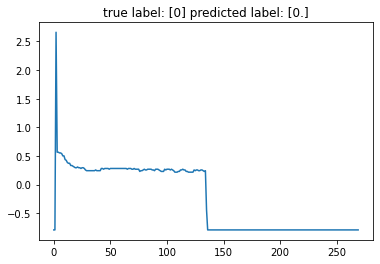

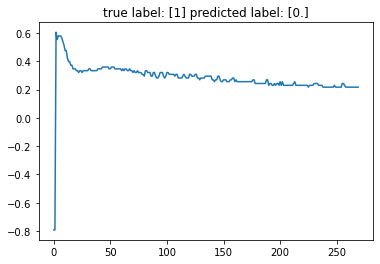

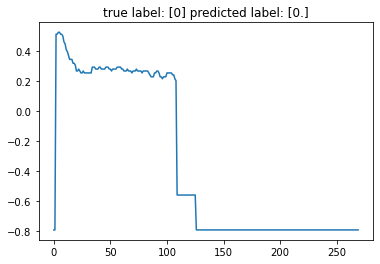

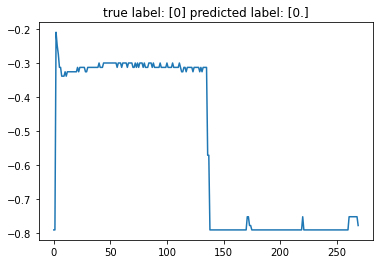

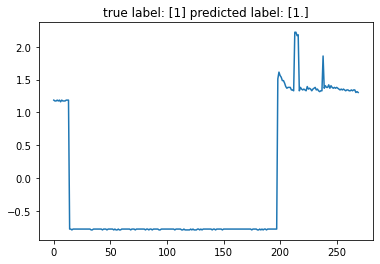

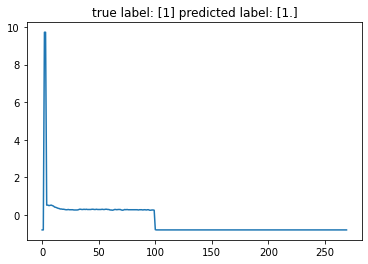

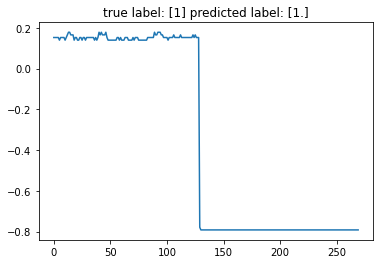

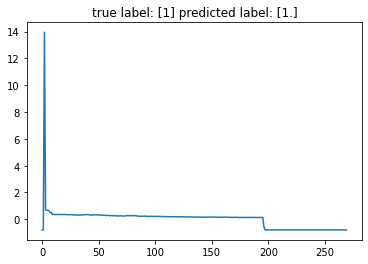

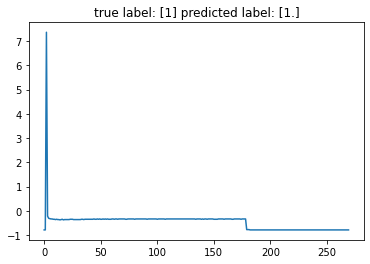

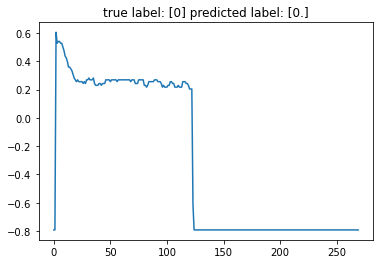

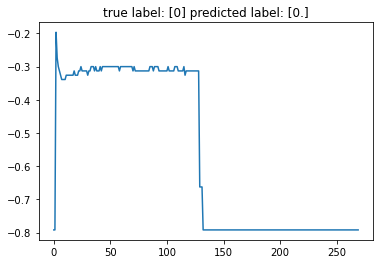

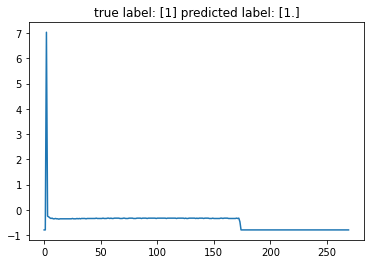

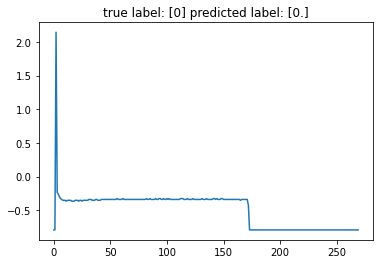

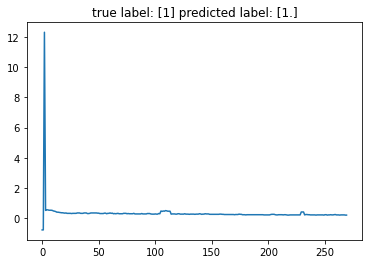

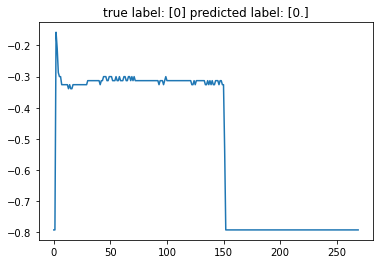

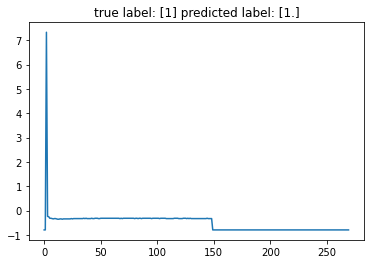

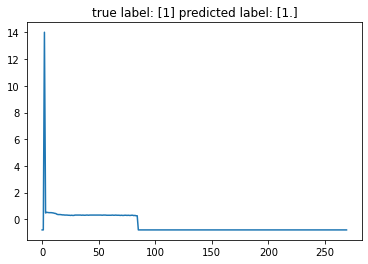

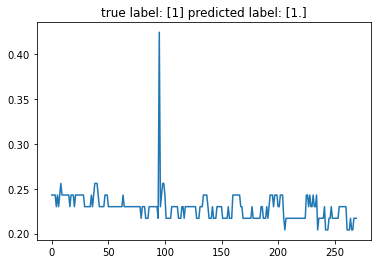

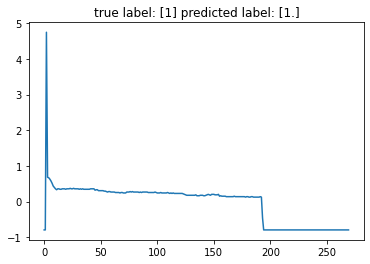

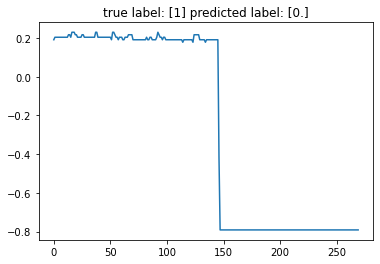

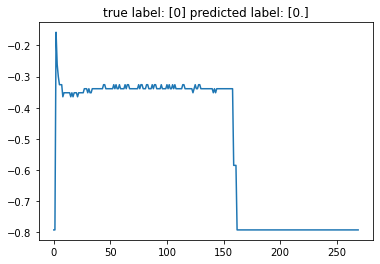

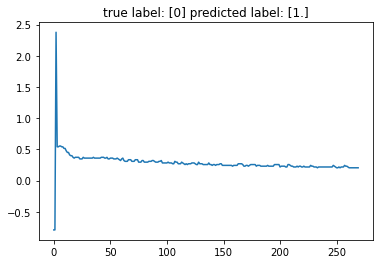

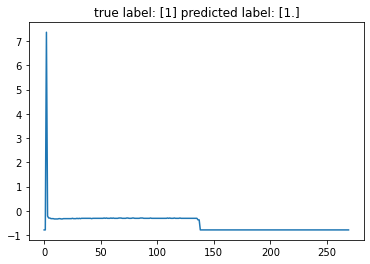

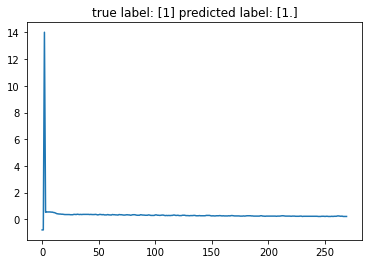

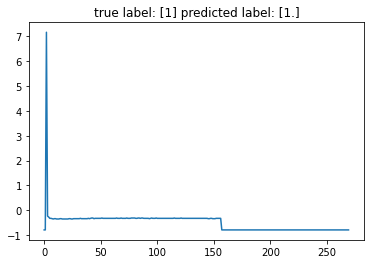

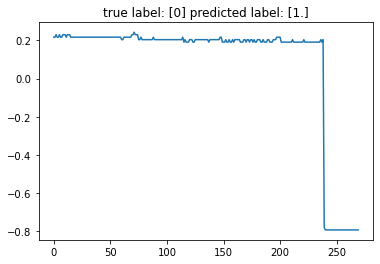

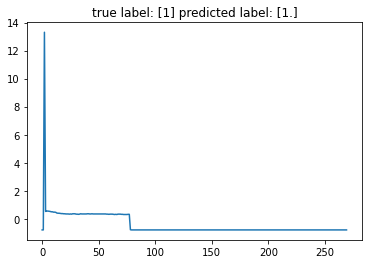

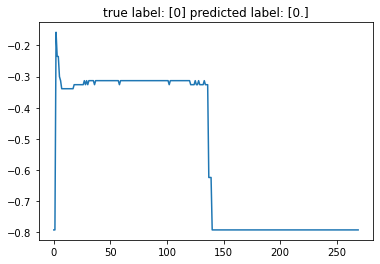

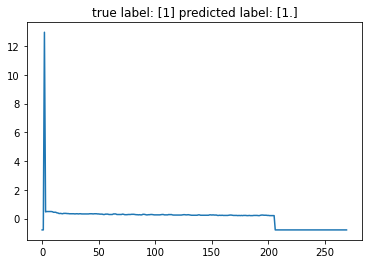

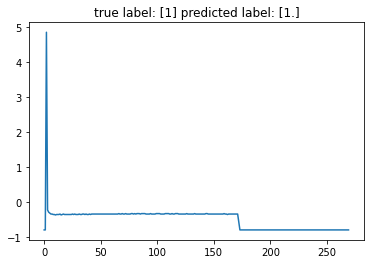

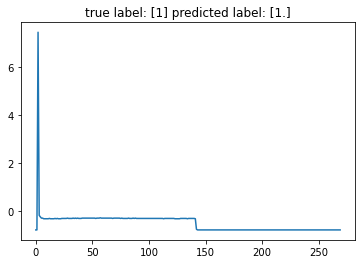

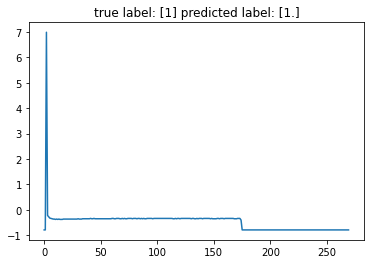

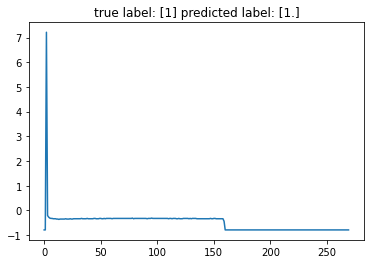

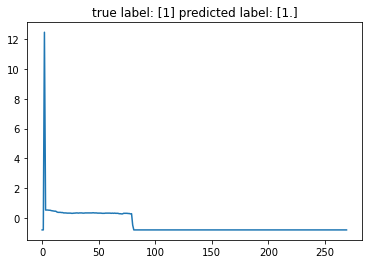

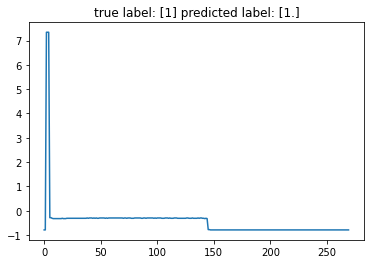

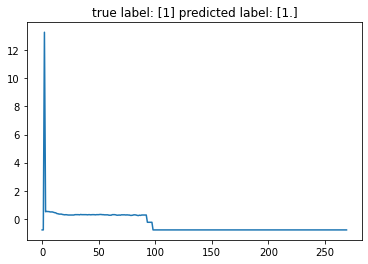

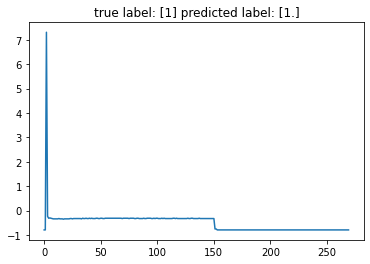

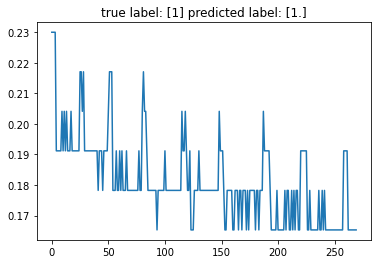

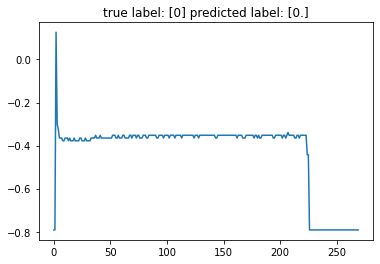

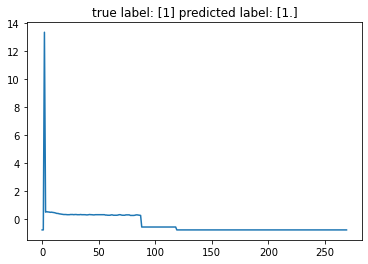

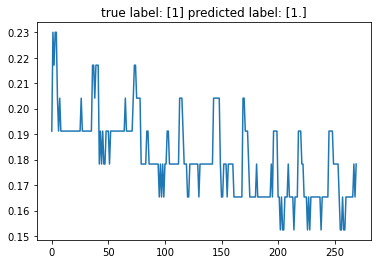

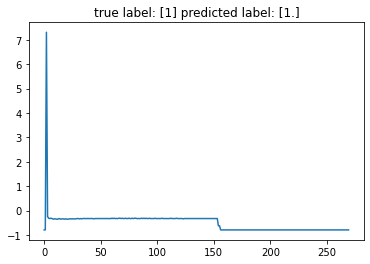

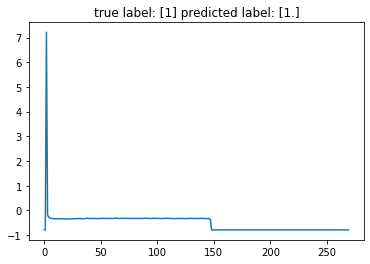

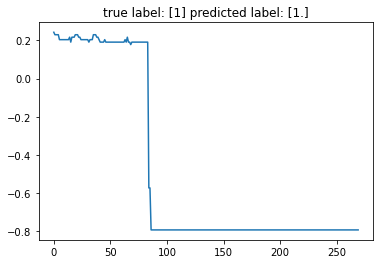

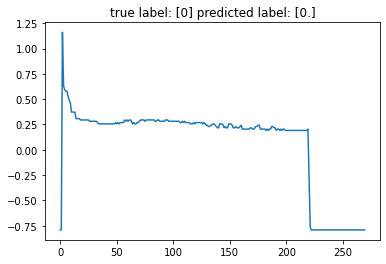

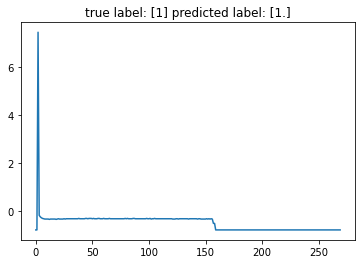

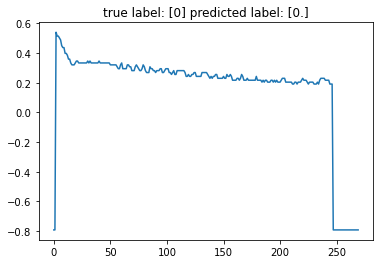

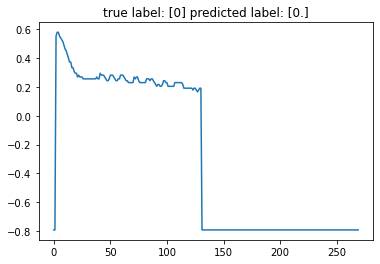

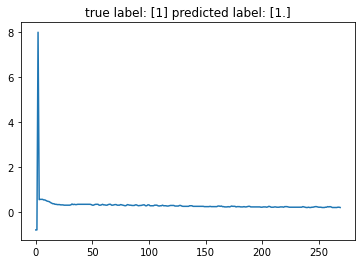

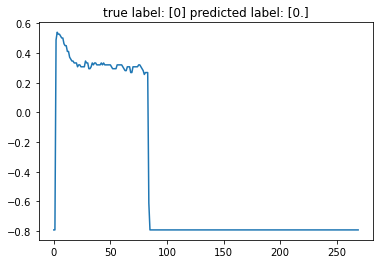

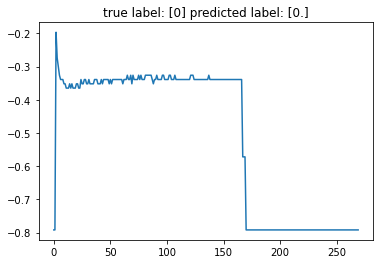

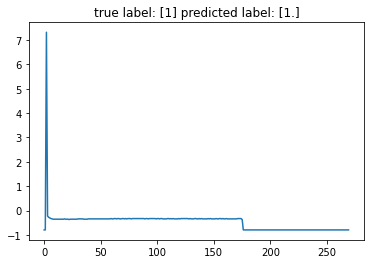

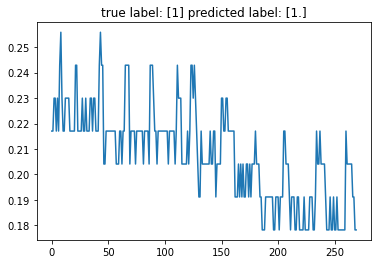

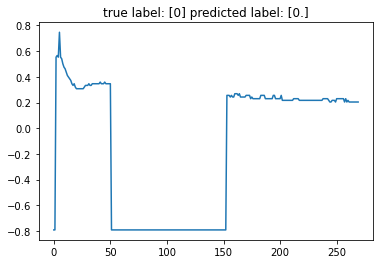

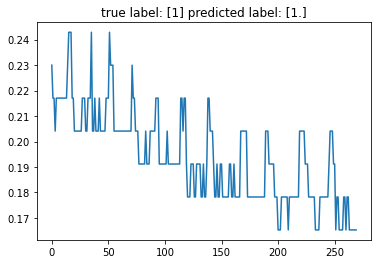

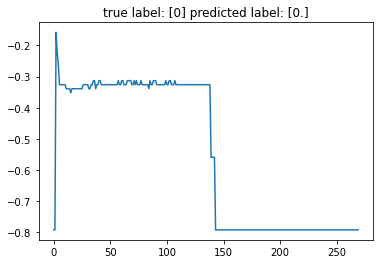

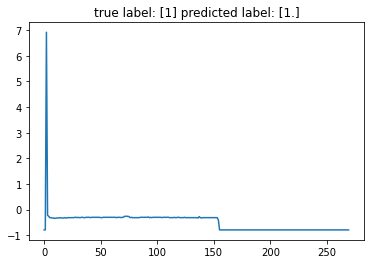

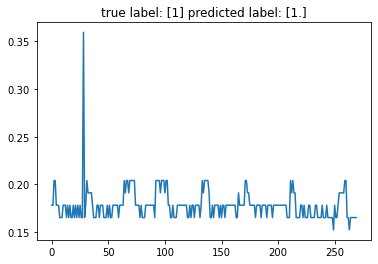

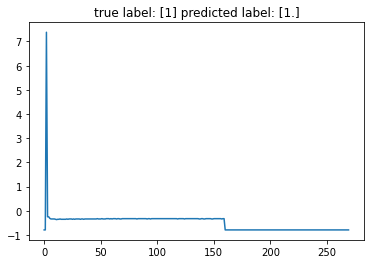

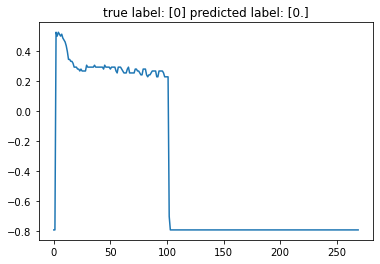

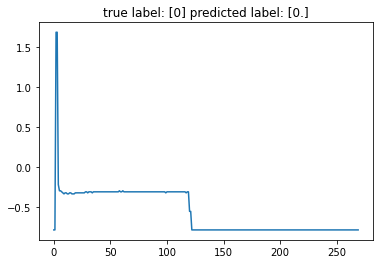

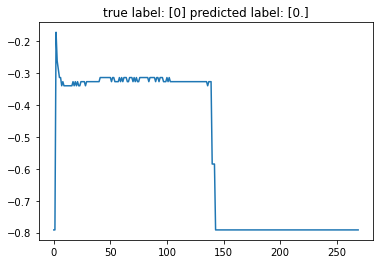

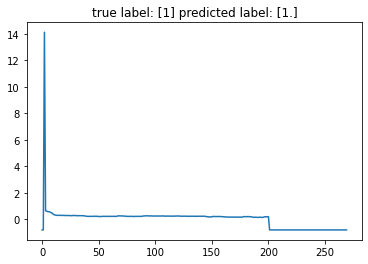

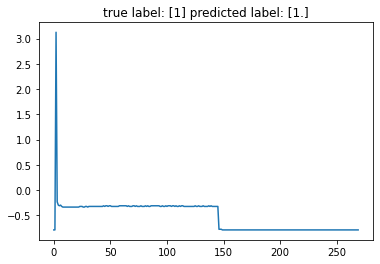

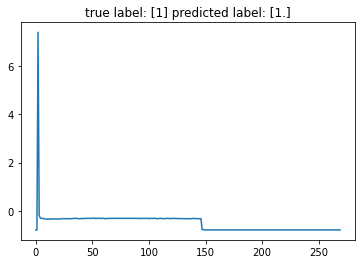

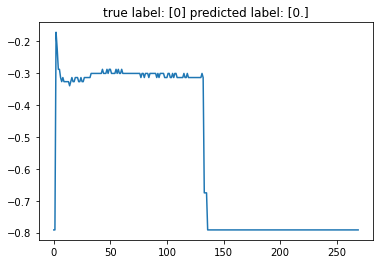

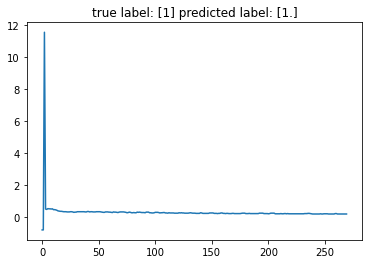

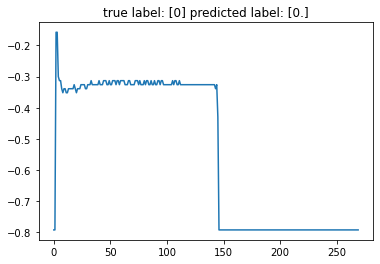

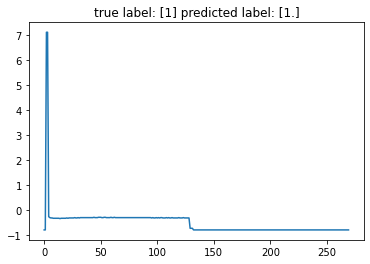

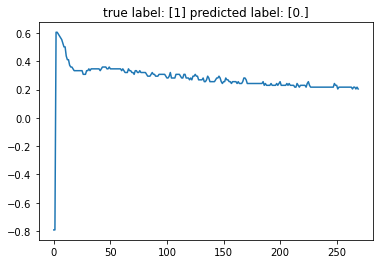

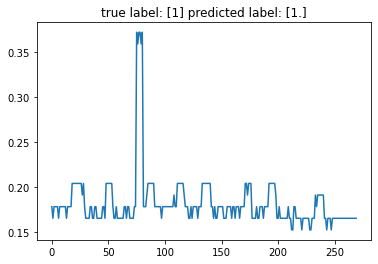

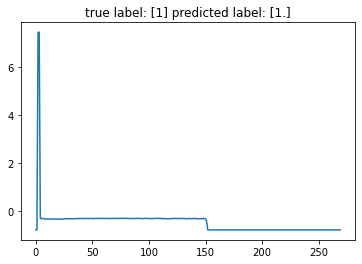

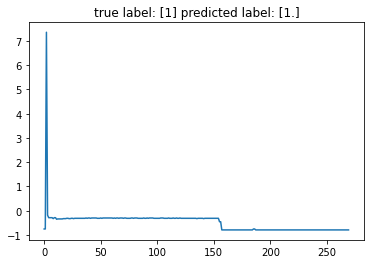

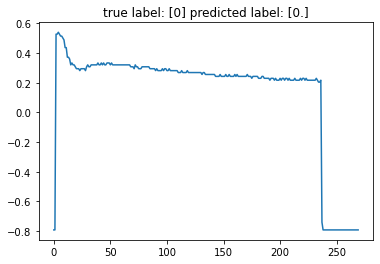

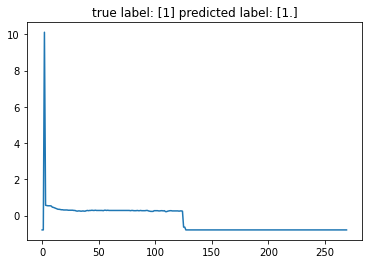

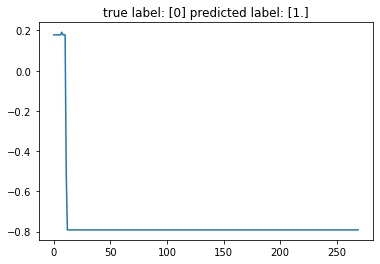

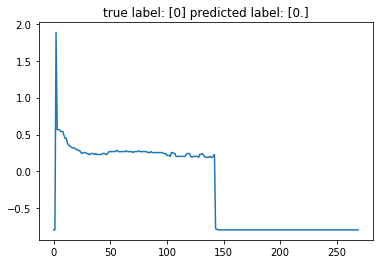

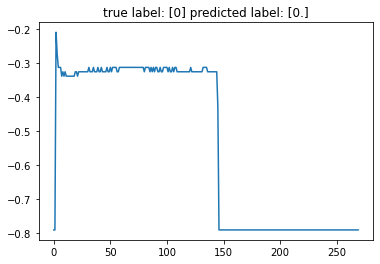

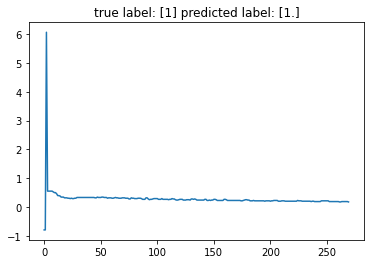

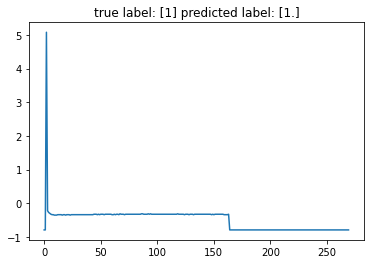

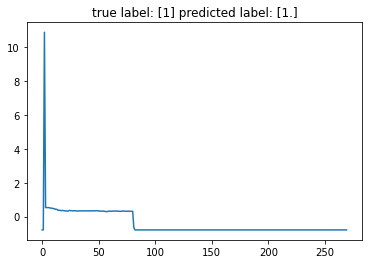

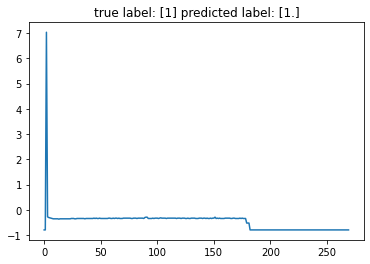

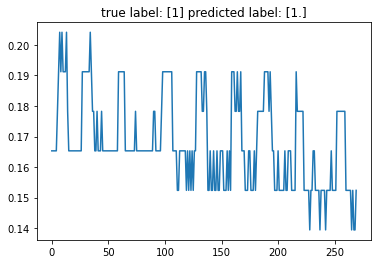

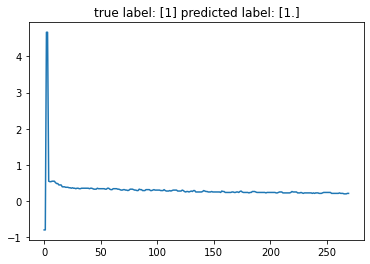

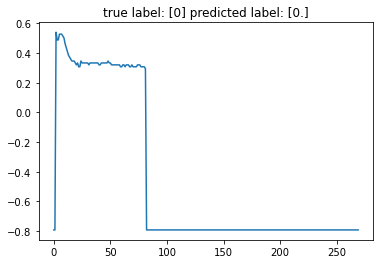

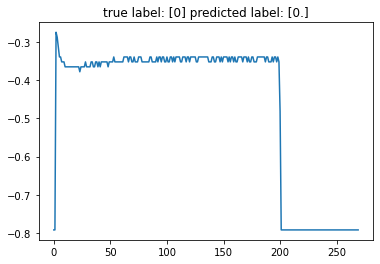

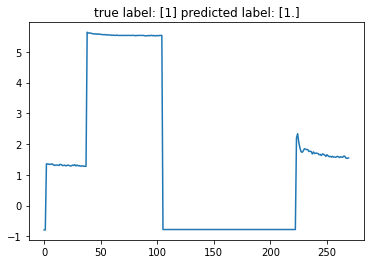

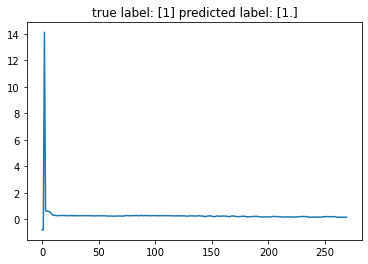

In [30]:
activation_list=random.sample(range(0, len(y_unseen)),100)
for i in activation_list:
    plt.figure()
    plt.plot(x_unseen[i])
    plt.title("true label: " +str(y_unseen[i])+" predicted label: "+str(predictions[i]))
    plt.savefig('plots/Conv_Model_Improved/activation_'+str(i)+'.jpg',dpi=184)